<a href="https://colab.research.google.com/github/amara929/amara929/blob/main/Ingaitsa_Vivian_Project_1_Expenditure_prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #import pandas for data manipulation
import numpy as np #import numpy for numerical operations
import plotly.express as px # import plotly express for interactive visualization
import plotly.graph_objects as go #import plotly Graphs objects for advanced visualization
import bokeh.plotting as bp #import Bokeh for web based interactive visualization
import altair as alt #import altair for declarative data visualization
import seaborn as sns #import seaborn for stastical data visualization
import matplotlib.pyplot as plt #importing Matplotlib for standard plotting
from scipy import stats #importing Scipy for stastical analysis
from statsmodels.tsa.arima.model import ARIMA #importing ARIMA model for time series forecasting
import geopandas as gpd #importing Geopandas for handling spatial data
import folium #importing Folium for interactive map visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [ ]:
df=pd.read_csv('/content/annual-enterprise-survey-2023-financial-year-provisional (1).csv')#Load data from CSV
csv_file = '/content/Linear_regression.csv'
if os.path.exists(csv_file):
  df = pd.read_csv(csv_file)
  df = pd.DataFrame(data.data, columns = data.feature_names)
  df['target']=data.target

ParserError: Error tokenizing data. C error: EOF inside string starting at row 13290

In [ ]:
# Create a LabelEncoder object
encoder = LabelEncoder()

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         50985 non-null  int64 
 1   Industry_aggregation_NZSIOC  50985 non-null  object
 2   Industry_code_NZSIOC         50985 non-null  object
 3   Industry_name_NZSIOC         50985 non-null  object
 4   Units                        50985 non-null  object
 5   Variable_code                50985 non-null  object
 6   Variable_name                50985 non-null  object
 7   Variable_category            50985 non-null  object
 8   Value                        50985 non-null  object
 9   Industry_code_ANZSIC06       50985 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         50985 non-null  int64 
 1   Industry_aggregation_NZSIOC  50985 non-null  object
 2   Industry_code_NZSIOC         50985 non-null  object
 3   Industry_name_NZSIOC         50985 non-null  object
 4   Units                        50985 non-null  object
 5   Variable_code                50985 non-null  object
 6   Variable_name                50985 non-null  object
 7   Variable_category            50985 non-null  object
 8   Value                        50985 non-null  object
 9   Industry_code_ANZSIC06       50985 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of        Year Industry_aggregation_NZSIOC Industry_code_NZSIOC  \
0      2023                     Level 1                99999   
1      2023                     Level 1                99999   
2      2023                     Level 1                99999   
3      2023                     Level 1                99999   
4      2023                     Level 1                99999   
...     ...                         ...                  ...   
50980  2013                     Level 3                 ZZ11   
50981  2013                     Level 3                 ZZ11   
50982  2013                     Level 3                 ZZ11   
50983  2013                     Level 3                 ZZ11   
50984  2013                     Level 3                 ZZ11   

             Industry_name_NZSIOC               Units Variable_code  \
0                  All industries  Dollars (millions)           H01   
1                  All industries  Dollars (millions)           H04   
2                  All industries  Dollars (millions)           H05   
3                  All industries  Dollars (millions)           H07   
4                  All industries  Dollars (millions)           H08   
...                           ...                 ...           ...   
50980  Food product manufacturing          Percentage           H37   
50981  Food product manufacturing          Percentage           H38   
50982  Food product manufacturing          Percentage           H39   
50983  Food product manufacturing          Percentage           H40   
50984  Food product manufacturing          Percentage           H41   

                                         Variable_name      Variable_category  \
0                                         Total income  Financial performance   
1      Sales, government funding, grants and subsidies  Financial performance   
2                    Interest, dividends and donations  Financial performance   
3                                 Non-operating income  Financial performance   
4                                    Total expenditure  Financial performance   
...                                                ...                    ...   
50980                                      Quick ratio       Financial ratios   
50981              Margin on sales of goods for resale       Financial ratios   
50982                                 Return on equity       Financial ratios   
50983                           Return on total assets       Financial ratios   
50984                            Liabilities structure       Financial ratios   

        Value                             Industry_code_ANZSIC06  
0      930995  ANZSIC06 divisions A-S (excluding classes K633...  
1      821630  ANZSIC06 divisions A-S (excluding classes K633...  
2       84354  ANZSIC06 divisions A-S (excluding classes K633...  
3       25010  ANZSIC06 divisions A-S (excluding classes K633...  
4      832964  ANZSIC06 divisions A-S (excluding classes K633...  
...       ...                                                ...  
50980      52  ANZSIC06 groups C111, C112, C113, C114, C115, ...  
50981      40  ANZSIC06 groups C111, C112, C113, C114, C115, ...  
50982      12  ANZSIC06 groups C111, C112, C113, C114, C115, ...  
50983       5  ANZSIC06 groups C111, C112, C113, C114, C115, ...  
50984      46  ANZSIC06 groups C111, C112, C113, C114, C115, ...  

[50985 rows x 10 columns]>

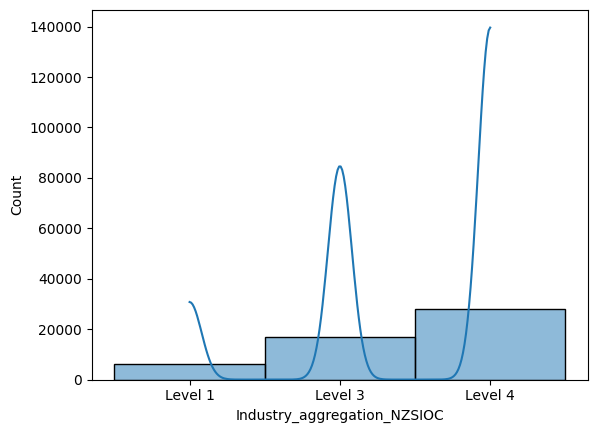

In [ ]:
# data visualization basics
sns.histplot(df['Industry_aggregation_NZSIOC'], bins=20, kde=True)
plt.show() # displaying the plot

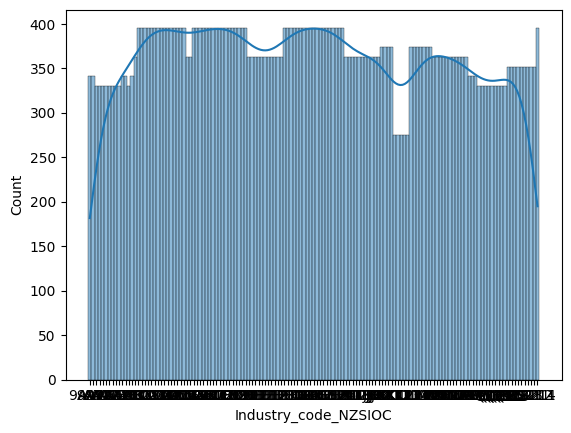

In [ ]:
#data visualization basics
sns.histplot(df['Industry_code_NZSIOC'], bins=100, kde=True)
plt.show() # displaying the plot

In [ ]:
#select one feature for simple linear regression
X = df[['Industry_aggregation_NZSIOC']].values
Y = df[['Industry_code_NZSIOC']].values

In [ ]:
#Fit and transform the 'Industry_code_NZSIOC' column in Y
Y = df[['Industry_code_NZSIOC']].values
Y_encoded = encoder.fit_transform(Y.ravel())
Y_encoded = Y_encoded.reshape(-1, 1)

In [ ]:
X

array([['Level 1'],
       ['Level 1'],
       ['Level 1'],
       ...,
       ['Level 3'],
       ['Level 3'],
       ['Level 3']], dtype=object)

In [ ]:
Y

array([['99999'],
       ['99999'],
       ['99999'],
       ...,
       ['ZZ11'],
       ['ZZ11'],
       ['ZZ11']], dtype=object)

In [ ]:
#Create a LabelEncoder object
encoder = LabelEncoder()

In [ ]:
#Fit and transform the 'Industry_aggregation_NZSIOC' column in X
X = df[['Industry_aggregation_NZSIOC']].values
X_encoded = encoder.fit_transform(X.ravel()) # ravel is used to flatten the array
X_encoded = X_encoded.reshape(-1, 1) # reshape to original shape

In [ ]:
#Fit and transform the 'Industry_code_NZSIOC' column in Y
Y = df[['Industry_code_NZSIOC']].values
Y_encoded = encoder.fit_transform(Y.ravel())
Y_encoded = Y_encoded.reshape(-1, 1)

In [ ]:
#Split into training and test set
y_pred = model.predict(X_test)
X_train, X_test, Y_train, Y_test =  train_test_split(X_encoded, Y_encoded, test_size = 0.2, random_state =42)

In [ ]:
#Create and train the model
model = LinearRegression()
model.fit(X_train, Y_train) # Now using encoded numeric

LinearRegression()

In [ ]:
X_test

array([[1],
       [2],
       [1],
       ...,
       [0],
       [2],
       [1]])

In [ ]:
#evaluate model
mae =  mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [ ]:
#model evaluation
print(f"Mean Absoluter Error:{mae}")
print(f"Mean squared Error:{mse}")
print(f"R2 sCORE: {r2}")

Mean Absoluter Error:33.8528106390654
Mean squared Error:1539.5446001173882
R2 sCORE: 0.010970887729412793


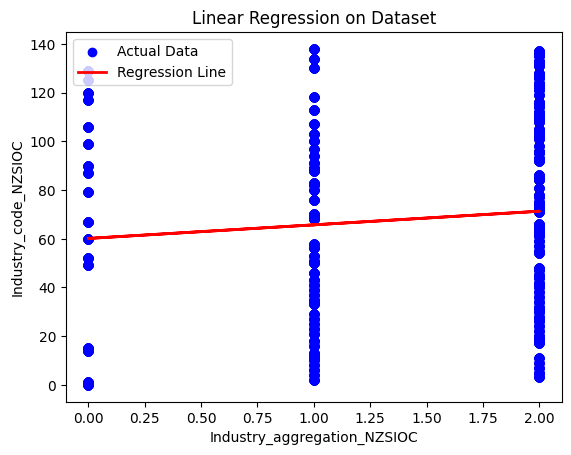

In [ ]:
#visualization
plt.scatter(X_test, Y_test ,color = 'blue', label = 'Actual Data')
plt.plot(X_test, y_pred, color = 'red', linewidth= 2,label = 'Regression Line')
plt.xlabel('Industry_aggregation_NZSIOC')
plt.ylabel('Industry_code_NZSIOC')
plt.legend()
plt.title('Linear Regression on Dataset')
plt.show()

In [ ]:
#function to predict expenditure progression for a given BMI
#function to predict expenditure progression for a given BMI
def predict_value(Industry_aggregation_NZSIOC_value):
    prediction = model.predict(np.array([[Industry_aggregation_NZSIOC_value]]))
    print(f"Predicted expenditure progression for Industry_aggregation_NZSIOC {Industry_aggregation_NZSIOC_value}: {prediction[0]}")
    return prediction[0]

#example prediction
Industry_aggregation_NZSIOC_input=20
predict_value(Industry_aggregation_NZSIOC_input)

Predicted expenditure progression for Industry_aggregation_NZSIOC 20: [171.79991261]


array([171.79991261])